## 1 The Data

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samruddhi4040/online-sales-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\KOVVO\.cache\kagglehub\datasets\samruddhi4040\online-sales-data\versions\1


In [2]:
# import some necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [3]:
#read the Details dataset
data = pd.read_csv("Details.csv")
data

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card
...,...,...,...,...,...,...,...
1495,B-25700,7,-3,2,Clothing,Hankerchief,COD
1496,B-25757,3151,-35,7,Clothing,Trousers,EMI
1497,B-25973,4141,1698,13,Electronics,Printers,COD
1498,B-25698,7,-2,1,Clothing,Hankerchief,COD


In [4]:
# check the datatypes of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
dtypes: int64(3), object(4)
memory usage: 82.2+ KB


In [5]:
# check the missing values
data.isnull().sum()*100

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64

In [6]:
# check the statistics of the data 
data.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.00000,1500.000000
mean,291.847333,24.64200,3.743333
std,461.924620,168.55881,2.184942
min,4.000000,-1981.00000,1.000000
25%,47.750000,-12.00000,2.000000
50%,122.000000,8.00000,3.000000
75%,326.250000,38.00000,5.000000
max,5729.000000,1864.00000,14.000000


## 2 Sales analysis

---

### 📊 **Revenue & Profit**

1. What is the total **revenue** (`Amount.sum()`)?
2. What is the total **profit** (`Profit.sum()`)?
3. What is the **average profit margin** per order?
4. Which **orders** had the highest revenue and profit?

---

***1. What is the total revenue (`Amount.sum()`)?***


In [7]:
total_revenue =data["Amount"].sum()
print("Total revenue is ",total_revenue)

Total revenue is  437771


***2. What is the total profit (`Profit.sum()`)?***


In [8]:
total_profit =data["Profit"].sum()
print("Total revenue is ",total_profit)

Total revenue is  36963


***3. What is the average profit margin per order?***


In [9]:
# Avoid division by zero
data = data[data["Amount"] != 0]

# Calculate profit margin per order
data["Profit_Margin"] = data["Profit"] / data["Amount"]

# Average profit margin
avg_profit_margin = data["Profit_Margin"].mean()

print("Average profit margin per order:", round(avg_profit_margin * 100, 2), "%")


Average profit margin per order: 1.92 %


***4. Which orders had the highest revenue and profit?***

In [10]:
# Top 5 orders by revenue
top_revenue_orders = data.sort_values(by="Amount", ascending=False).head(5)
print("Top 5 orders by revenue:")
print(top_revenue_orders[["Order ID", "Amount", "Profit"]])

# Top 5 orders by profit
top_profit_orders = data.sort_values(by="Profit", ascending=False).head(5)
print("\nTop 5 orders by profit:")
print(top_profit_orders[["Order ID", "Amount", "Profit"]])


Top 5 orders by revenue:
     Order ID  Amount  Profit
1     B-26055    5729      64
1499  B-25993    4363     305
1497  B-25973    4141    1698
12    B-25923    3873    -891
1496  B-25757    3151     -35

Top 5 orders by profit:
     Order ID  Amount  Profit
59    B-25608    1364    1864
1497  B-25973    4141    1698
32    B-26022    1824    1303
4     B-25602    2617    1151
1423  B-25601    1275    1148


---
### 📦 **Product & Category Performance**

5. Which **categories** generate the most revenue and profit?
6. Which **sub-categories** are performing the best and worst?
7. What is the **average quantity** sold per category or sub-category?
8. Which sub-categories have **high sales but low profit**?

---

***5. Which categories generate the most revenue and profit?***



In [11]:
# Group by Category and sum Amount and Profit
category_summary = data.groupby("Category")[["Amount", "Profit"]].sum().sort_values(by="Amount", ascending=False)

print("Revenue and Profit by Category:")
print(category_summary)


Revenue and Profit by Category:
             Amount  Profit
Category                   
Electronics  166267   13162
Clothing     144323   13325
Furniture    127181   10476


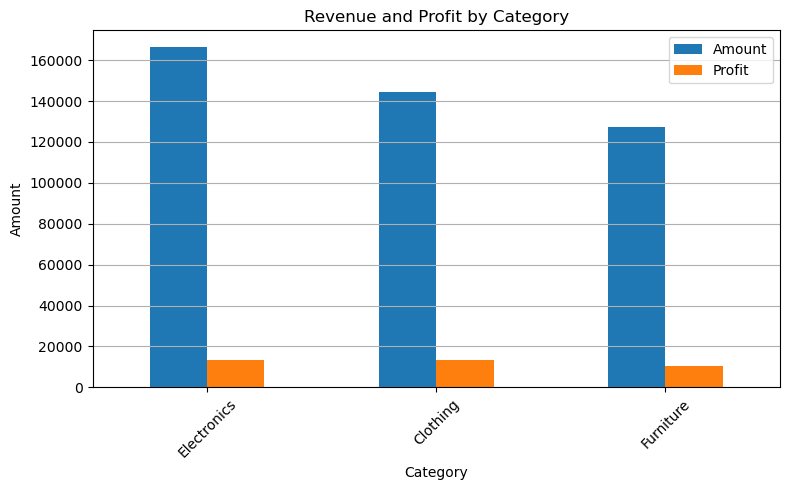

In [ ]:
category_summary.plot(kind="bar", figsize=(8,5))
plt.title("Revenue and Profit by Category")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


***6. Which sub-categories are performing the best and worst?***


In [12]:
# Group by Sub-Category and sum Amount and Profit
subcat_summary = data.groupby("Sub-Category")[["Amount", "Profit"]].sum()

# Best performing (highest revenue & profit)
best_revenue = subcat_summary.sort_values(by="Amount", ascending=False).head(5)
best_profit = subcat_summary.sort_values(by="Profit", ascending=False).head(5)

# Worst performing (lowest revenue & profit)
worst_revenue = subcat_summary.sort_values(by="Amount", ascending=True).head(5)
worst_profit = subcat_summary.sort_values(by="Profit", ascending=True).head(5)

print("🔝 Top 5 Sub-Categories by Revenue:\n", best_revenue)
print("\n💰 Top 5 Sub-Categories by Profit:\n", best_profit)
print("\n🔻 Bottom 5 Sub-Categories by Revenue:\n", worst_revenue)
print("\n📉 Bottom 5 Sub-Categories by Profit:\n", worst_profit)


🔝 Top 5 Sub-Categories by Revenue:
                   Amount  Profit
Sub-Category                    
Printers           59252    8606
Saree              59094    4057
Bookcases          56861    6516
Phones             46119    1847
Electronic Games   39168    -644

💰 Top 5 Sub-Categories by Profit:
               Amount  Profit
Sub-Category                
Printers       59252    8606
Bookcases      56861    6516
Saree          59094    4057
Accessories    21728    3353
Tables         22614    3139

🔻 Bottom 5 Sub-Categories by Revenue:
               Amount  Profit
Sub-Category                
Skirt           1946    -315
Leggings        2106    -130
Kurti           3361    -401
T-shirt         7382    1500
Shirt           7555    1513

📉 Bottom 5 Sub-Categories by Profit:
                   Amount  Profit
Sub-Category                    
Furnishings        13484    -806
Electronic Games   39168    -644
Kurti               3361    -401
Skirt               1946    -315
Leggings      

***7. What is the average quantity sold per category or sub-category?***


In [13]:
# Average quantity sold per category
avg_quantity_by_category = data.groupby("Category")["Quantity"].mean()

# Average quantity sold per sub-category
avg_quantity_by_subcategory = data.groupby("Sub-Category")["Quantity"].mean()

print("Average Quantity Sold per Category:\n", avg_quantity_by_category)
print("\nAverage Quantity Sold per Sub-Category:\n", avg_quantity_by_subcategory)


Average Quantity Sold per Category:
 Category
Clothing       3.704953
Electronics    3.746753
Furniture      3.888889
Name: Quantity, dtype: float64

Average Quantity Sold per Sub-Category:
 Sub-Category
Accessories         3.638889
Bookcases           3.759494
Chairs              3.743243
Electronic Games    3.759494
Furnishings         4.246575
Hankerchief         3.761421
Kurti               3.489362
Leggings            3.509434
Phones              3.662651
Printers            3.932432
Saree               3.767773
Shirt               3.927536
Skirt               3.875000
Stole               3.494792
T-shirt             3.961039
Tables              3.588235
Trousers            3.461538
Name: Quantity, dtype: float64


***8. Which sub-categories have high sales but low profit?***

In [14]:
# Group by Category and sum Amount and Profit
category_summary = data.groupby("Category")[["Amount", "Profit"]].sum().sort_values(by="Amount", ascending=False)

print("Revenue and Profit by Category:")
print(category_summary)


Revenue and Profit by Category:
             Amount  Profit
Category                   
Electronics  166267   13162
Clothing     144323   13325
Furniture    127181   10476


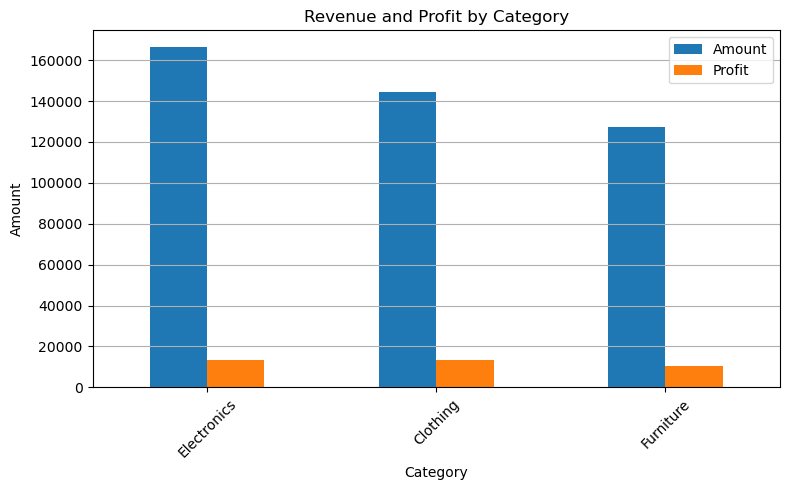

In [ ]:
category_summary.plot(kind="bar", figsize=(8,5))
plt.title("Revenue and Profit by Category")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



---
### 💳 **Payment Behavior**

9. What are the most used **payment modes**?
10. Is there a difference in **profit or quantity sold by payment method**?

---

***9. What are the most used payment modes?***


In [21]:
data["PaymentMode"].value_counts()

PaymentMode
COD            684
UPI            331
Debit Card     202
Credit Card    163
EMI            120
Name: count, dtype: int64

***10. Is there a difference in profit or quantity sold by payment method?***

In [22]:
# Group by PaymentMode and calculate total profit and total quantity sold
payment_summary = data.groupby("PaymentMode")[["Profit", "Quantity"]].sum()

# You can also calculate the average for each
payment_avg = data.groupby("PaymentMode")[["Profit", "Quantity"]].mean()

print("Total Profit and Quantity Sold by Payment Method:\n", payment_summary)
print("\nAverage Profit and Quantity Sold by Payment Method:\n", payment_avg)


Total Profit and Quantity Sold by Payment Method:
              Profit  Quantity
PaymentMode                  
COD           12547      2456
Credit Card   12612       672
Debit Card     3694       741
EMI            4824       589
UPI            3286      1157

Average Profit and Quantity Sold by Payment Method:
                 Profit  Quantity
PaymentMode                     
COD          18.343567  3.590643
Credit Card  77.374233  4.122699
Debit Card   18.287129  3.668317
EMI          40.200000  4.908333
UPI           9.927492  3.495468


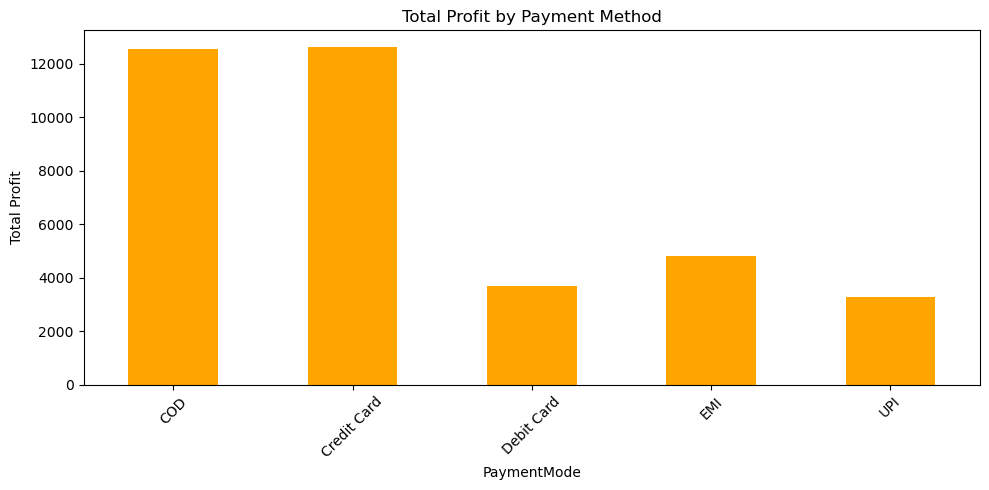

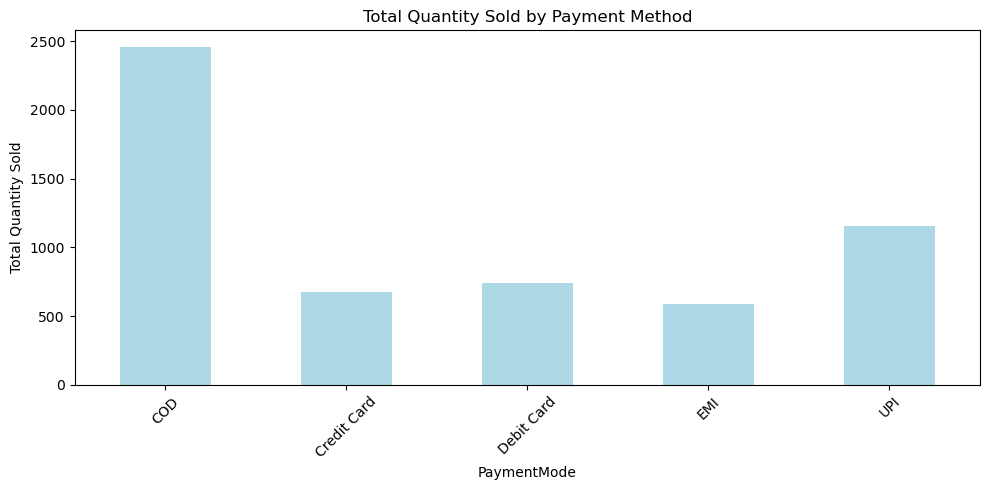

In [23]:
# Plot for total profit by PaymentMode
payment_summary["Profit"].plot(kind="bar", figsize=(10,5), color='orange')
plt.title("Total Profit by Payment Method")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for total quantity sold by PaymentMode
payment_summary["Quantity"].plot(kind="bar", figsize=(10,5), color='lightblue')
plt.title("Total Quantity Sold by Payment Method")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


---
### 🔍 **Order-level Analysis**

11. What is the **average order value** (AOV)?
12. How many total **orders** were placed?
13. What is the **distribution of profit and amount per order**?

---



***11. What is the average order value (AOV)?***



The **Average Order Value** (AOV) is the average amount spent per order. It can be calculated by dividing the total **revenue** (or **Amount**) by the total number of **orders**.

---

### ✅ Formula for AOV:

$$
\text{AOV} = \frac{\text{Total Revenue (Amount)}}{\text{Number of Orders}}
$$


```

In [24]:
# Calculate the total revenue (Amount)
total_revenue = data["Amount"].sum()

# Calculate the total number of unique orders
total_orders = data["Order ID"].nunique()

# Calculate Average Order Value (AOV)
AOV = total_revenue / total_orders

print("Average Order Value (AOV):", round(AOV, 2))

Average Order Value (AOV): 875.54


***12. How many total orders were placed?***


In [ ]:
# Calculate the total number of unique orders
total_orders = data["Order ID"].nunique()
print("Total number of orders placed:", total_orders)

Total number of orders placed: 500


***13. What is the distribution of profit and amount per order?***

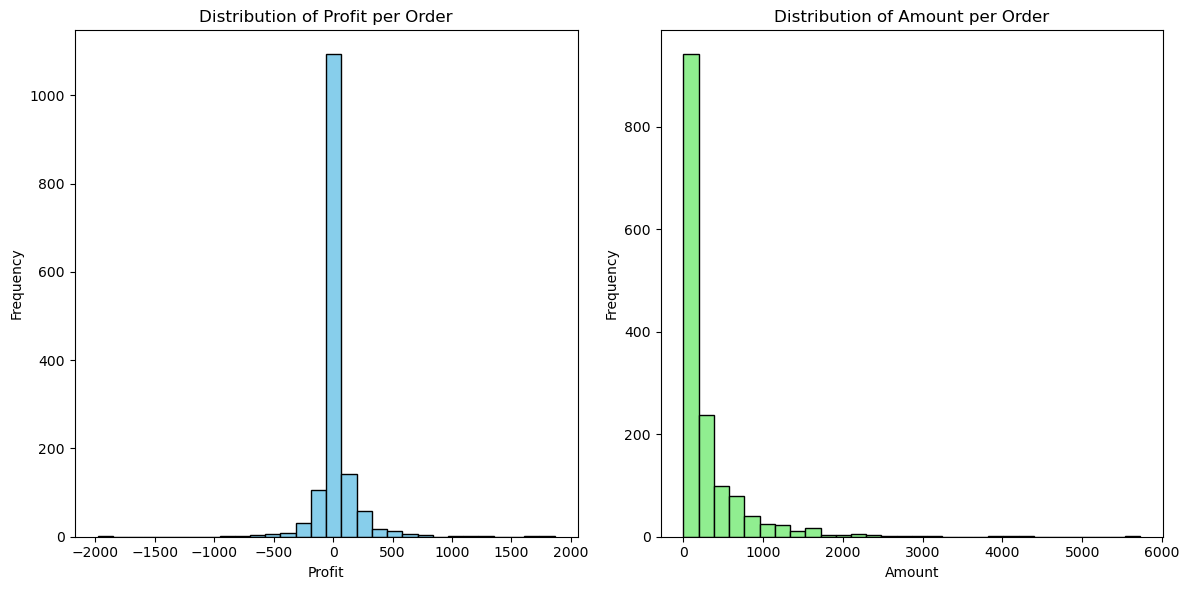

In [38]:
import matplotlib.pyplot as plt

# Plot the distribution of profit per order
plt.figure(figsize=(12, 6))

# Profit distribution
plt.subplot(1, 2, 1)
plt.hist(data["Profit"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Profit per Order")
plt.xlabel("Profit")
plt.ylabel("Frequency")

# Amount distribution
plt.subplot(1, 2, 2)
plt.hist(data["Amount"], bins=30, color='lightgreen', edgecolor='black')
plt.title("Distribution of Amount per Order")
plt.xlabel("Amount")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



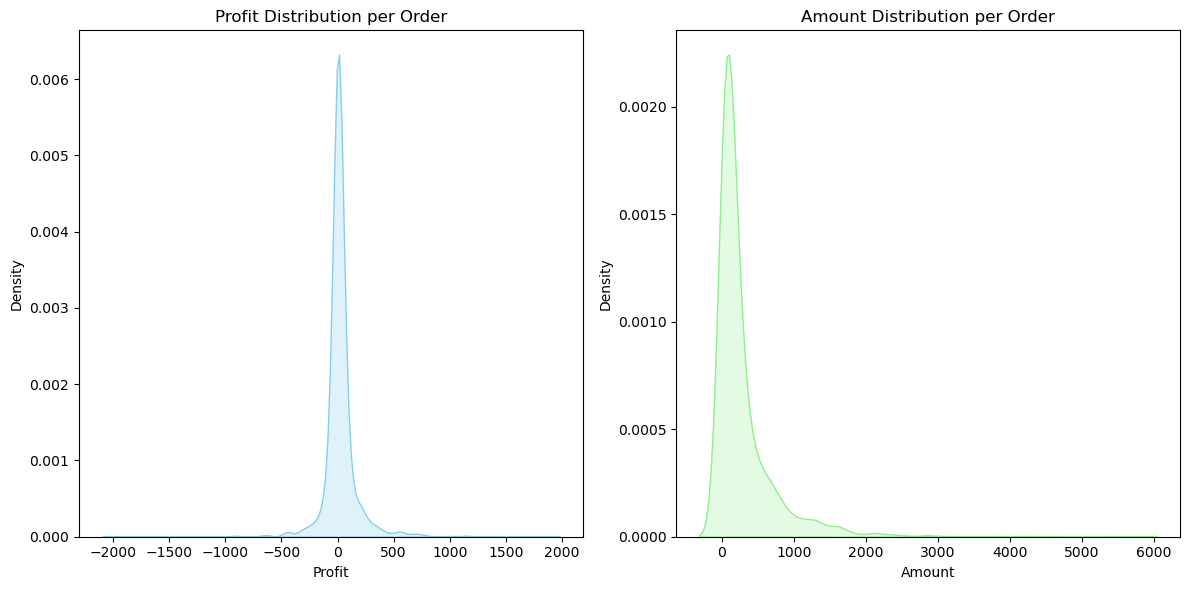

In [39]:
import seaborn as sns
# Plot the distribution of profit per order
plt.figure(figsize=(12, 6))

# Profit distribution
plt.subplot(1, 2, 1)
sns.kdeplot(data["Profit"], fill=True, color='skyblue')
plt.title("Profit Distribution per Order")
plt.xlabel("Profit")
plt.ylabel("Density")

# Amount distribution
plt.subplot(1, 2, 2)
sns.kdeplot(data["Amount"], fill=True, color='lightgreen')
plt.title("Amount Distribution per Order")
plt.xlabel("Amount")
plt.ylabel("Density")

plt.tight_layout()
plt.show()
